# User Engagement Analysis in Navigation App Usage

## Project Overview
This Jupyter Notebook focuses on analyzing user engagement in a navigation app, leveraging a dataset provided in `waze_dataset.csv`. The primary goal is to uncover insights into how users interact with the app, their driving habits, and how these behaviors evolve over time.

Key questions to explore:
1. How do user sessions and driving activities change over time?
2. Are there differences in engagement patterns among different user categories (e.g., retained vs others)?
3. What correlations exist between different aspects of user engagement, such as sessions, driving distances, and activity days?

By the end of this analysis, we aim to provide valuable insights that could help in enhancing user engagement strategies for the app.


In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

df = pd.read_csv("C:/Users/samir/Downloads/waze_dataset.csv"'')

In [7]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [8]:
missing_values = df.isnull().sum()
data_types = df.dtypes

# Display the missing values and data types
missing_values, data_types

(ID                           0
 label                      700
 sessions                     0
 drives                       0
 total_sessions               0
 n_days_after_onboarding      0
 total_navigations_fav1       0
 total_navigations_fav2       0
 driven_km_drives             0
 duration_minutes_drives      0
 activity_days                0
 driving_days                 0
 device                       0
 dtype: int64,
 ID                           int64
 label                       object
 sessions                     int64
 drives                       int64
 total_sessions             float64
 n_days_after_onboarding      int64
 total_navigations_fav1       int64
 total_navigations_fav2       int64
 driven_km_drives           float64
 duration_minutes_drives    float64
 activity_days                int64
 driving_days                 int64
 device                      object
 dtype: object)

## Handling Missing Values

Upon initial inspection, we notice that the `label` column contains missing values. As this column is significant for categorizing users, we need to decide on an appropriate method to handle these missing values. Options include:
1. Dropping rows with missing `label` values.
2. Imputing missing values, if a logical method is available.
3. Leaving the missing values as-is, if they're not critical for our initial analysis.

Given that our primary focus is on user engagement metrics rather than user categorization, for this initial phase, we will proceed without addressing these missing `label` values directly. However, this decision might be revisited in later stages of the analysis.


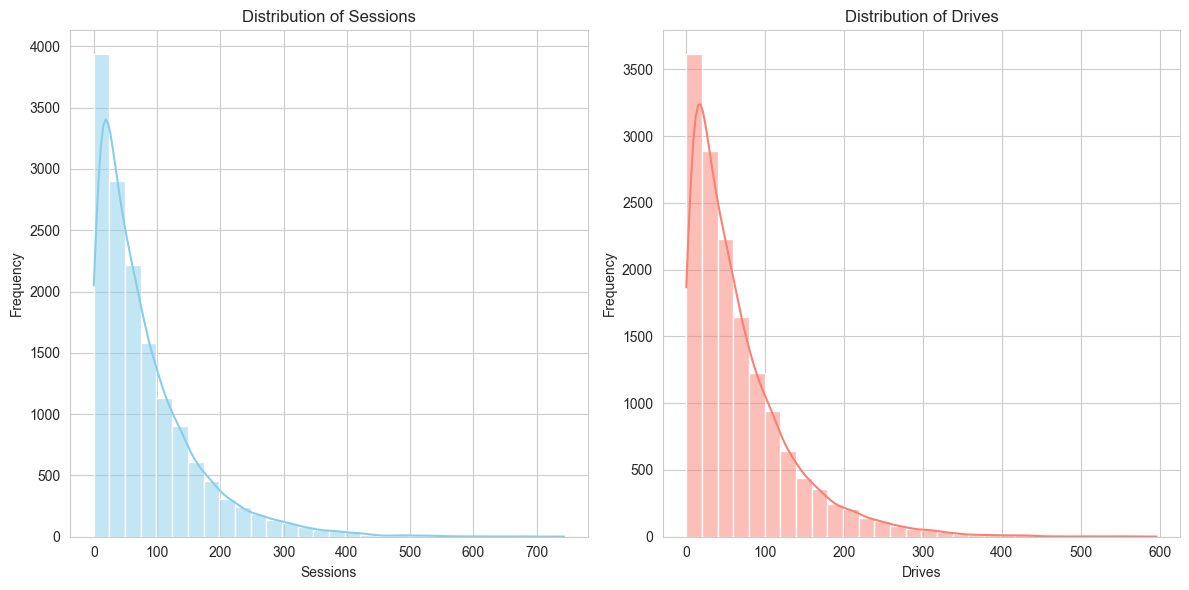

In [11]:
# Visualization of the distribution of sessions and drives
plt.figure(figsize=(12, 6))

# Sessions Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['sessions'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Sessions')
plt.xlabel('Sessions')
plt.ylabel('Frequency')

# Drives Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['drives'], kde=True, bins=30, color='salmon')
plt.title('Distribution of Drives')
plt.xlabel('Drives')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Interpretation of Sessions and Drives Distribution

The histograms for both sessions and drives appear right-tailed, indicating that most users have a lower number of sessions and drives, with fewer users having very high numbers. This pattern is typical in user engagement data where a large number of users engage minimally, and a small number are highly active. The presence of outliers can be inferred from the long tails, suggesting that there are some users with exceptionally high engagement.


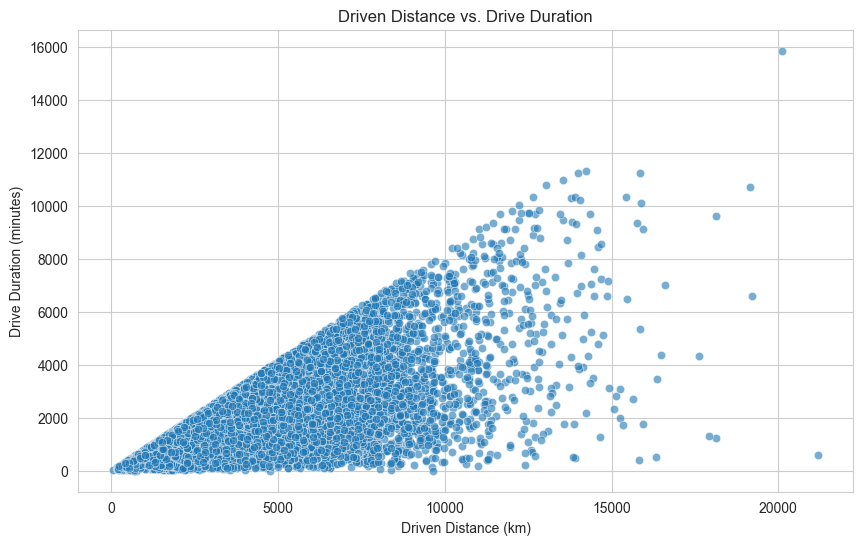

In [12]:
# Scatter plot for Driven Distance vs Drive Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='driven_km_drives', y='duration_minutes_drives', data=df, alpha=0.6)
plt.title('Driven Distance vs. Drive Duration')
plt.xlabel('Driven Distance (km)')
plt.ylabel('Drive Duration (minutes)')
plt.show()


<div align="center">
    <h2> Detailed Analysis of User Engagement Metrics </h2>
</div>

---

<div align="justify">


### Correlation between Driven Distance and Drive Duration

The scatter plot showing the relationship between driven distance and drive duration indicates a positive correlation, as expected. However, the variability in this relationship can be attributed to different user scenarios:

- **Highway vs. City Driving**: Points with a higher distance but shorter duration likely represent highway driving, which is faster. Conversely, shorter distances with longer durations could indicate city driving, where traffic and stops are frequent.
- **Efficiency Opportunities**: Identifying segments where users spend more time for shorter distances could help in optimizing routes or providing traffic updates to enhance user experience.

---

### Next Steps: Metrics for Deeper Analysis

To build upon these findings, the following metrics can be analyzed:

1. **Engagement Over Different Time Frames**: Analyze weekly or monthly trends in sessions and drives to understand short-term vs. long-term engagement.
2. **Session Length Analysis**: Investigate the average duration of sessions to gauge how long users interact with the app per session.
3. **User Retention Analysis**: Explore how user engagement changes over the course of their lifecycle with the app.
4. **Device-Based Engagement**: Compare engagement metrics across different devices (Android vs. iPhone) to see if there are platform-specific patterns.
5. **Geographical Trends**: If location data is available, analyze engagement patterns across different regions or cities.

Each of these metrics can provide deeper insights into user engagement, helping to tailor the app's features and marketing strategies more effectively.

</div>


C:\Users\samir\AppData\Local\Temp\ipykernel_26300\2980105562.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = waze_df.corr()


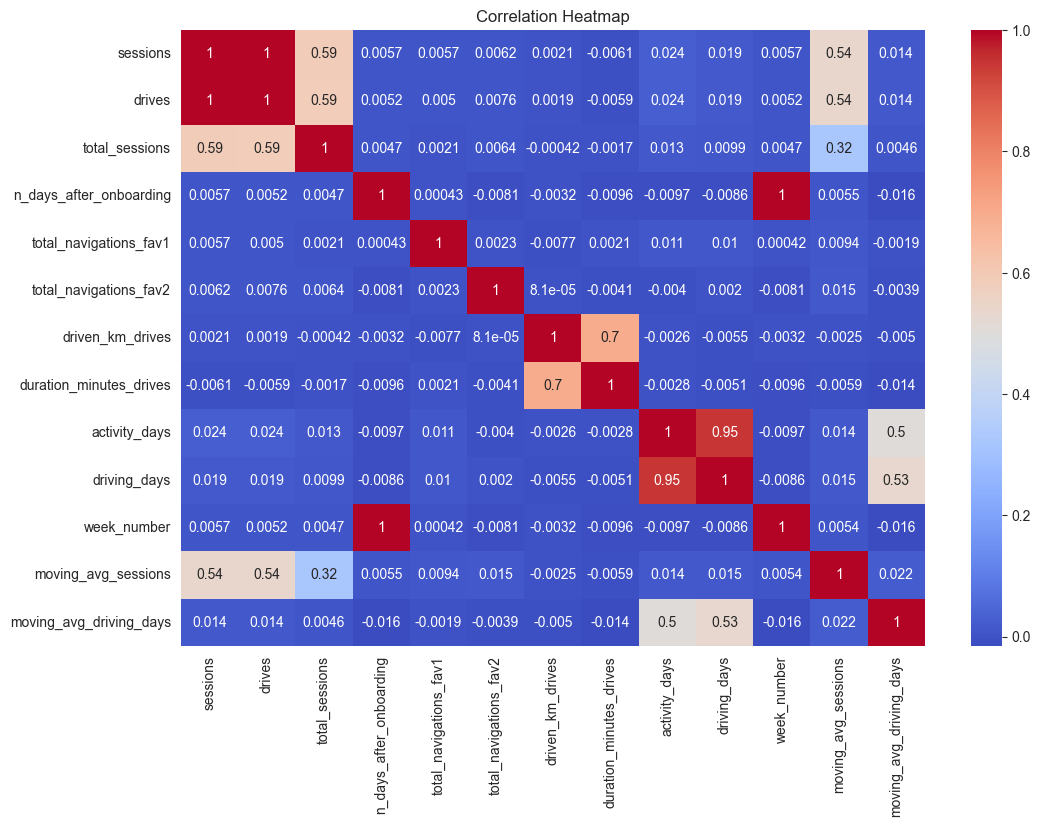

In [22]:
# Drop the 'ID' column from the DataFrame
waze_df = df.drop('ID', axis=1)


correlation_matrix = waze_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Interpretation of the Correlation Matrix

The correlation matrix provides valuable insights into the relationships between different user engagement metrics in the dataset. Key observations include:

- **Sessions and Drives**: A high positive correlation between 'sessions' and 'drives' suggests that users who frequently use the app also tend to have more driving sessions. This indicates a strong engagement with the app's core functionality.

- **Total Sessions and Activity Days**: If 'total_sessions' and 'activity_days' show a strong positive correlation, it implies that more active days correlate with a higher total number of sessions. This can be an indicator of consistent app usage over time.

- **Driven KM and Duration of Drives**: A significant positive correlation here would mean that longer drives (in duration) typically involve more kilometers driven. This can help in understanding if the app is more commonly used for longer or shorter trips.

- **Navigations to Favorite Destinations**: Correlations between 'total_navigations_fav1' and 'total_navigations_fav2' with other metrics like sessions or driven kilometers can reveal how the feature of navigating to favorite destinations contributes to overall engagement.

- **Device Type Differences**: If the correlations differ significantly when segmented by 'device' (e.g., Android vs iPhone), it might indicate different usage patterns or preferences based on the device type.
